# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata,
                             how="left",  on='Mouse ID')

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
print(mouse_count)

249


In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_df)

['g989']


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_df_clean =  combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicate_mouse_df)==True]
combined_mouse_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_df_clean =  combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicate_mouse_df)==False]

combined_mouse_df_clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


len(combined_mouse_df_clean["Mouse ID"].unique())

In [63]:
# Checking the number of mice in the clean DataFrame.
len(combined_mouse_df_clean["Mouse ID"].unique())

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Capomulin_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Capomulin")]
Ceftamin_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Ceftamin")]
Infubinol_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Infubinol")]
Ketapril_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Ketapril")]
Naftisol_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Naftisol")]
Placebo_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Placebo")]
Propriva_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Propriva")]
Ramicane_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Ramicane")]
Stelasyn_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Stelasyn")]
Zoniferol_t = combined_mouse_df_clean[(combined_mouse_df_clean["Drug Regimen"] == "Zoniferol")]


Capomulin_tm = Capomulin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Capomulin_tme = Capomulin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Capomulin_tv = Capomulin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Capomulin_ts = Capomulin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Capomulin_tse = Capomulin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

capomulin_df = pd.DataFrame({
    "Mean Tumor Volume": Capomulin_tm,
    "Median Tumor Volume": Capomulin_tme,
    "Tumor Volume Variance": Capomulin_tv,
    "Tumor Volume Std. Dev.": Capomulin_ts,
    "Tumor Volume Std. Err.":Capomulin_tse
    })
capomulin_df

Ceftamin_tm = Ceftamin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Ceftamin_tme = Ceftamin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Ceftamin_tv = Ceftamin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Ceftamin_ts = Ceftamin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Ceftamin_tse = Ceftamin_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Ceftamin_df = pd.DataFrame({
    "Mean Tumor Volume": Ceftamin_tm,
    "Median Tumor Volume": Ceftamin_tme,
    "Tumor Volume Variance": Ceftamin_tv,
    "Tumor Volume Std. Dev.": Ceftamin_ts,
    "Tumor Volume Std. Err.":Ceftamin_tse
    })
Ceftamin_df

Infubinol_tm = Infubinol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Infubinol_tme = Infubinol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Infubinol_tv = Infubinol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Infubinol_ts = Infubinol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Infubinol_tse = Infubinol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Infubinol_df = pd.DataFrame({
    "Mean Tumor Volume": Infubinol_tm,
    "Median Tumor Volume": Infubinol_tme,
    "Tumor Volume Variance": Infubinol_tv,
    "Tumor Volume Std. Dev.": Infubinol_ts,
    "Tumor Volume Std. Err.":Infubinol_tse
    })
Infubinol_df

Ketapril_tm = Ketapril_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Ketapril_tme = Ketapril_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Ketapril_tv = Ketapril_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Ketapril_ts = Ketapril_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Ketapril_tse = Ketapril_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Ketapril_df = pd.DataFrame({
    "Mean Tumor Volume": Ketapril_tm,
    "Median Tumor Volume": Ketapril_tme,
    "Tumor Volume Variance": Ketapril_tv,
    "Tumor Volume Std. Dev.": Ketapril_ts,
    "Tumor Volume Std. Err.":Ketapril_tse
    })
Ketapril_df

Naftisol_tm = Naftisol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Naftisol_tme = Naftisol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Naftisol_tv = Naftisol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Naftisol_ts = Naftisol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Naftisol_tse = Naftisol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Naftisol_df = pd.DataFrame({
    "Mean Tumor Volume": Naftisol_tm,
    "Median Tumor Volume": Naftisol_tme,
    "Tumor Volume Variance": Naftisol_tv,
    "Tumor Volume Std. Dev.": Naftisol_ts,
    "Tumor Volume Std. Err.": Naftisol_tse
    })
Naftisol_df

Placebo_tm = Placebo_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Placebo_tme = Placebo_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Placebo_tv = Placebo_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Placebo_ts = Placebo_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Placebo_tse = Placebo_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Placebo_df = pd.DataFrame({
    "Mean Tumor Volume": Placebo_tm,
    "Median Tumor Volume": Placebo_tme,
    "Tumor Volume Variance": Placebo_tv,
    "Tumor Volume Std. Dev.": Placebo_ts,
    "Tumor Volume Std. Err.": Placebo_tse
    })
Placebo_df

Propriva_tm = Propriva_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Propriva_tme = Propriva_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Propriva_tv = Propriva_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Propriva_ts = Propriva_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Propriva_tse = Propriva_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Propriva_df = pd.DataFrame({
    "Mean Tumor Volume": Propriva_tm,
    "Median Tumor Volume": Propriva_tme,
    "Tumor Volume Variance": Propriva_tv,
    "Tumor Volume Std. Dev.": Propriva_ts,
    "Tumor Volume Std. Err.": Propriva_tse
    })
Propriva_df

Ramicane_tm = Ramicane_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Ramicane_tme = Ramicane_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Ramicane_tv = Ramicane_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Ramicane_ts = Ramicane_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Ramicane_tse = Ramicane_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Ramicane_df = pd.DataFrame({
    "Mean Tumor Volume": Ramicane_tm,
    "Median Tumor Volume": Ramicane_tme,
    "Tumor Volume Variance": Ramicane_tv,
    "Tumor Volume Std. Dev.": Ramicane_ts,
    "Tumor Volume Std. Err.": Ramicane_tse
    })
Ramicane_df

Stelasyn_tm = Stelasyn_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Stelasyn_tme = Stelasyn_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Stelasyn_tv = Stelasyn_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Stelasyn_ts = Stelasyn_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Stelasyn_tse = Stelasyn_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Stelasyn_df = pd.DataFrame({
    "Mean Tumor Volume": Stelasyn_tm,
    "Median Tumor Volume": Stelasyn_tme,
    "Tumor Volume Variance": Stelasyn_tv,
    "Tumor Volume Std. Dev.": Stelasyn_ts,
    "Tumor Volume Std. Err.": Stelasyn_tse
    })
Stelasyn_df

Zoniferol_tm = Zoniferol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Zoniferol_tme = Zoniferol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Zoniferol_tv = Zoniferol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Zoniferol_ts = Zoniferol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Zoniferol_tse = Zoniferol_t.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Zoniferol_df = pd.DataFrame({
    "Mean Tumor Volume": Zoniferol_tm,
    "Median Tumor Volume": Zoniferol_tme,
    "Tumor Volume Variance": Zoniferol_tv,
    "Tumor Volume Std. Dev.": Zoniferol_ts,
    "Tumor Volume Std. Err.": Zoniferol_tse
    })
Zoniferol_df

Summary_df = pd.concat([capomulin_df, Ceftamin_df,Infubinol_df,Ketapril_df,
                                Naftisol_df,Placebo_df,Propriva_df,Ramicane_df,
                                Stelasyn_df,Zoniferol_df
                              ])
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get total number of each regimen
regimen_data = combined_mouse_df_clean["Drug Regimen"].value_counts()

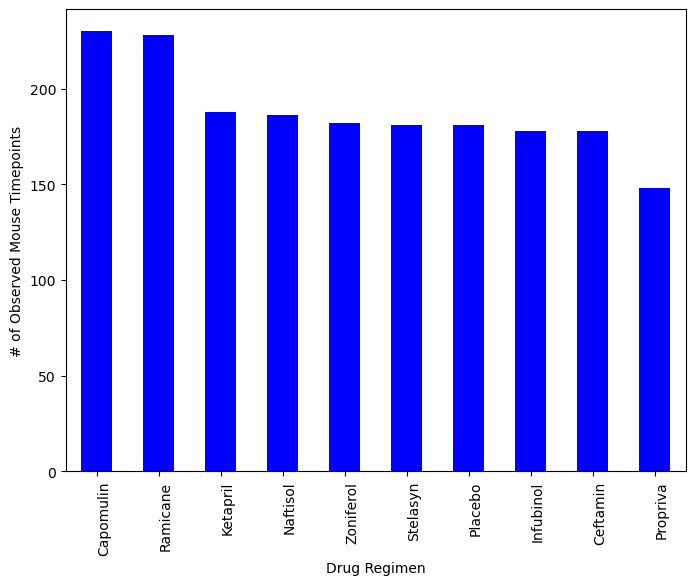

In [67]:
# Configure plot, figsize, title, and axis labels
figure1 = regimen_data.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = regimen_data.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get total number of each regimen
regimen_data = combined_mouse_df_clean["Drug Regimen"].value_counts()

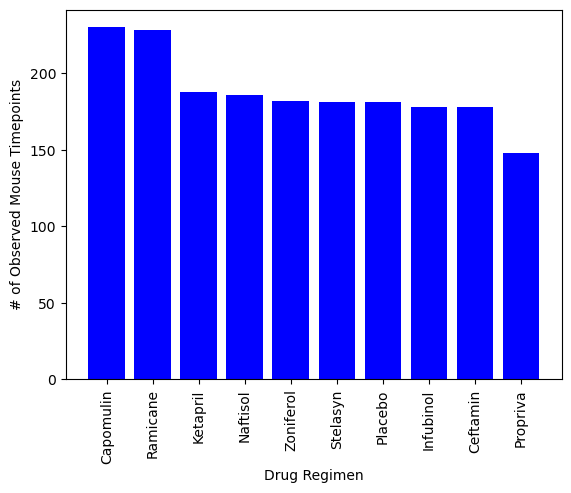

In [76]:
# ploting the bar chart using pyplot
plt.bar(regimen_data.index, regimen_data.values, color="blue",)
plt.xlabel('Drug Regimen',)
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation = 90)
#show the plot
plt.show()

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get total number of each regimen
sex_data = combined_mouse_df_clean["Sex"].value_counts()

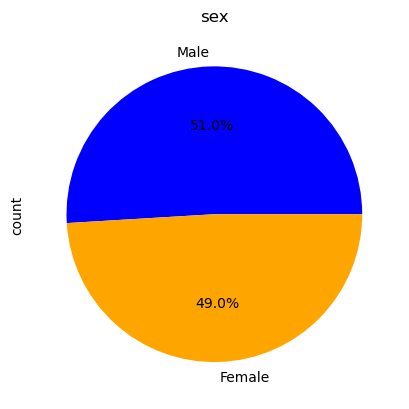

In [82]:
#ploting the pie chart using pandas
sex_data.plot(kind = 'pie', autopct="%1.1f%%", colors = ["blue", "orange"], title= "sex")
plt.show()

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = combined_mouse_df_clean["Sex"].value_counts()
sex_data

Sex
Male      958
Female    922
Name: count, dtype: int64

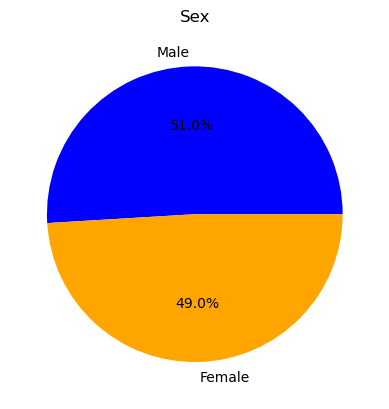

In [87]:
plt.pie(sex_data, labels= sex_data.index, autopct="%1.1f%%", colors=["blue", "orange"],  )
plt.title("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

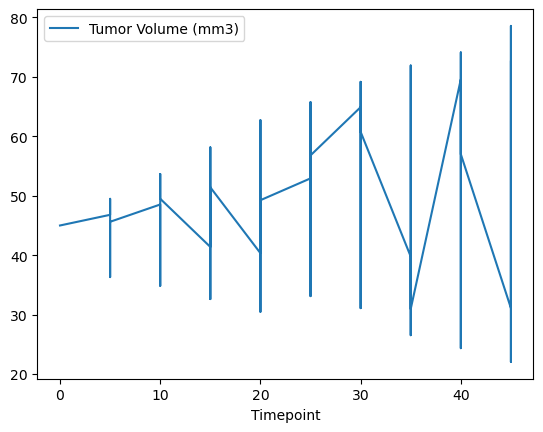

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
combined_mouse_df_clean.plot(x = "Timepoint", y = "Tumor Volume (mm3)", kind = "line")

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
